In [1]:
from functions import *
import numpy as np

/Users/zoestephens/Desktop/summer2024/.venv/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
# Loading data files

# embeddings
embeddings = pd.read_csv("csv_files/embeddings.csv")
embeddings2d = pd.read_csv("csv_files/embeddings2D.csv")

# kmeans clusters
clusters = pd.read_csv("csv_files/kmeansClusters.csv")

<h2>Plotting the Intertias of Clusters</h2>
In order to determine the optimal number of clusters, the elbow test is often used. Below we graph the inertias from 5 to 50 clusters and look for an elbow. Unfortunately there is no clear elbow present, so in future analyses we use cluster numbers generally from 20-30 clusters.

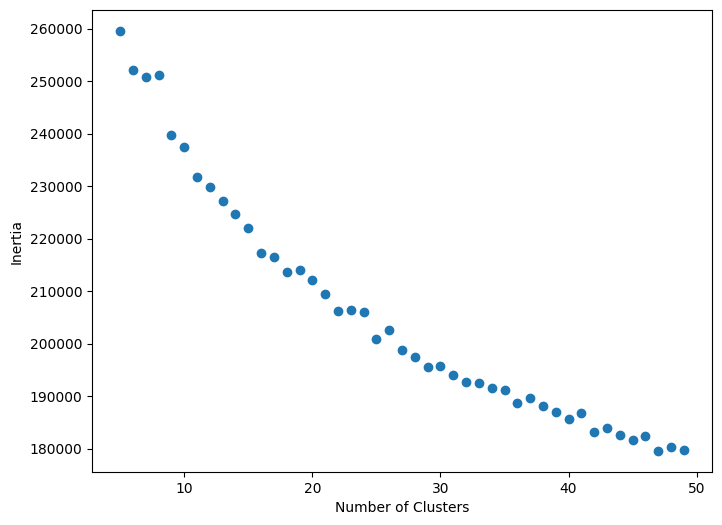

In [3]:
# Showing Inertias of kmeans and saving to file
# takes about 3 mins to run
kmeansToTest = range(5,50)
clusterDf = doKmeans(embeddings,kmeansToTest,showIntertias=True,saveInertias=True)

<h2>Visualizing Clusters</h2>
Below you can see a 2D visualization of the text clusters. The visualization is made by collapsing the embeddings into 2D and then graphing them based on the cluster nums chosen. The collapsing process has been explored through a variety of methods: T-SNE, PCA, and UMAP. UMAP parameters were modified to ensure the best clustering results.

In [3]:
import umap.umap_ as umap

reducer = umap.UMAP(n_neighbors=50,min_dist=0,metric='mahalanobis')
#newEmbeddings2D = pd.DataFrame(PCA(n_components=2).fit_transform(embeddings.drop("Description",axis=1)))
newEmbeddings2D = pd.DataFrame(reducer.fit_transform(embeddings.drop("Description",axis=1)))


# To Test
# manhattan
# canberra
# mahalanobis
# cosine
# hamming

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [9]:
# 2D visualization of clusters

# import needed to choose colorscheme
import matplotlib.cm as cm

def visualize2D(embeddings2d,clusters):
    # number of clusters to test
    clusterNum = 17

    # colors and title
    colors = cm.Paired(np.linspace(0, 1, clusterNum))
    plt.figure(figsize=(7,6))
    plt.title("2D Cluster Representation")
    # scatter each cluster with the appropriate color
    for cluster in range(clusterNum):
        indexList = clusters.index[clusters['Kmeans '+str(clusterNum)] == cluster].tolist()
        this = embeddings2d.iloc[indexList]
        plt.scatter(this[0],this[1],color = colors[cluster],s=5,label="Cluster "+str(cluster))

    # add legend, show graph, and save graph to file

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig("../html_files/clusters.png",bbox_inches="tight")
    plt.show()

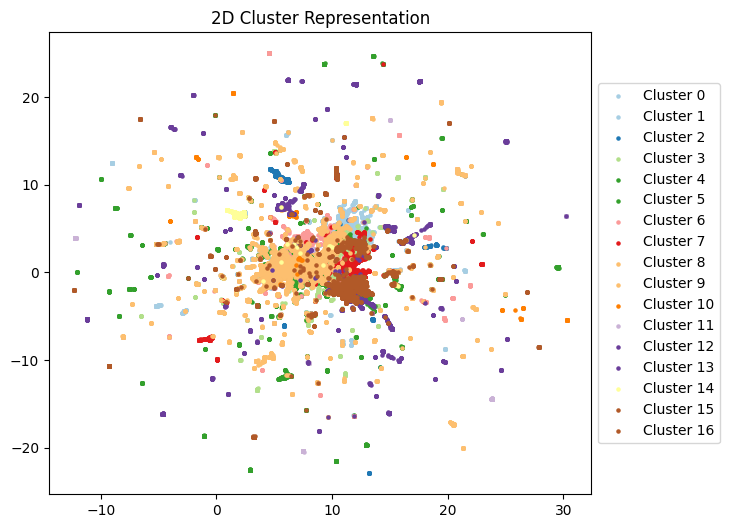

In [10]:
visualize2D(newEmbeddings2D,clusters)

<h2>Examining Clusters</h2>
To manually look at the clusters of rules created, use the below function and scroll through the output.

In [5]:
# retrieve specific cluster data from a cluster number
clusterNum = 25
printClusterSet(clusterDf,clusterNum)



Printing 25 cluster set:

Cluster 0
                                          Description  Kmeans 25
25               exactly two (non-intersecting) lines          0
60                                    diagnonal lines          0
101                           lines below the horizon          0
102                           lines above the horizon          0
109               single line with at least one angle          0
...                                               ...        ...
68983      topologically equivalent to one plain line          0
68984  not topologically equivalent to one plain line          0
68985      topologically equivalent to one plain line          0
69002                    contains 3 unconnected lines          0
69004                    contains 2 unconnected lines          0

[2373 rows x 2 columns]



Cluster 1
                                  Description  Kmeans 25
42                                    triples          1
67                            